# Figure 1: Single-cell RNA sequencing of BAL fluid reveals myeloid, lymphoid, and epithelial cell populations present in interstitial lung disease.

In [ ]:
import scanpy as sc
import pandas as pd

# Inital setting for plot size
import matplotlib.pyplot as plt
from matplotlib import rcParams

FIGSIZE = (15,10)
rcParams["figure.figsize"] = FIGSIZE

# Plot UMAP with high resolution
from adjustText import adjust_text

# Load data
data = sc.read_h5ad("data/BAL_FINAL.h5ad")

## Figure 1a: Full UMAP of all BAL cells

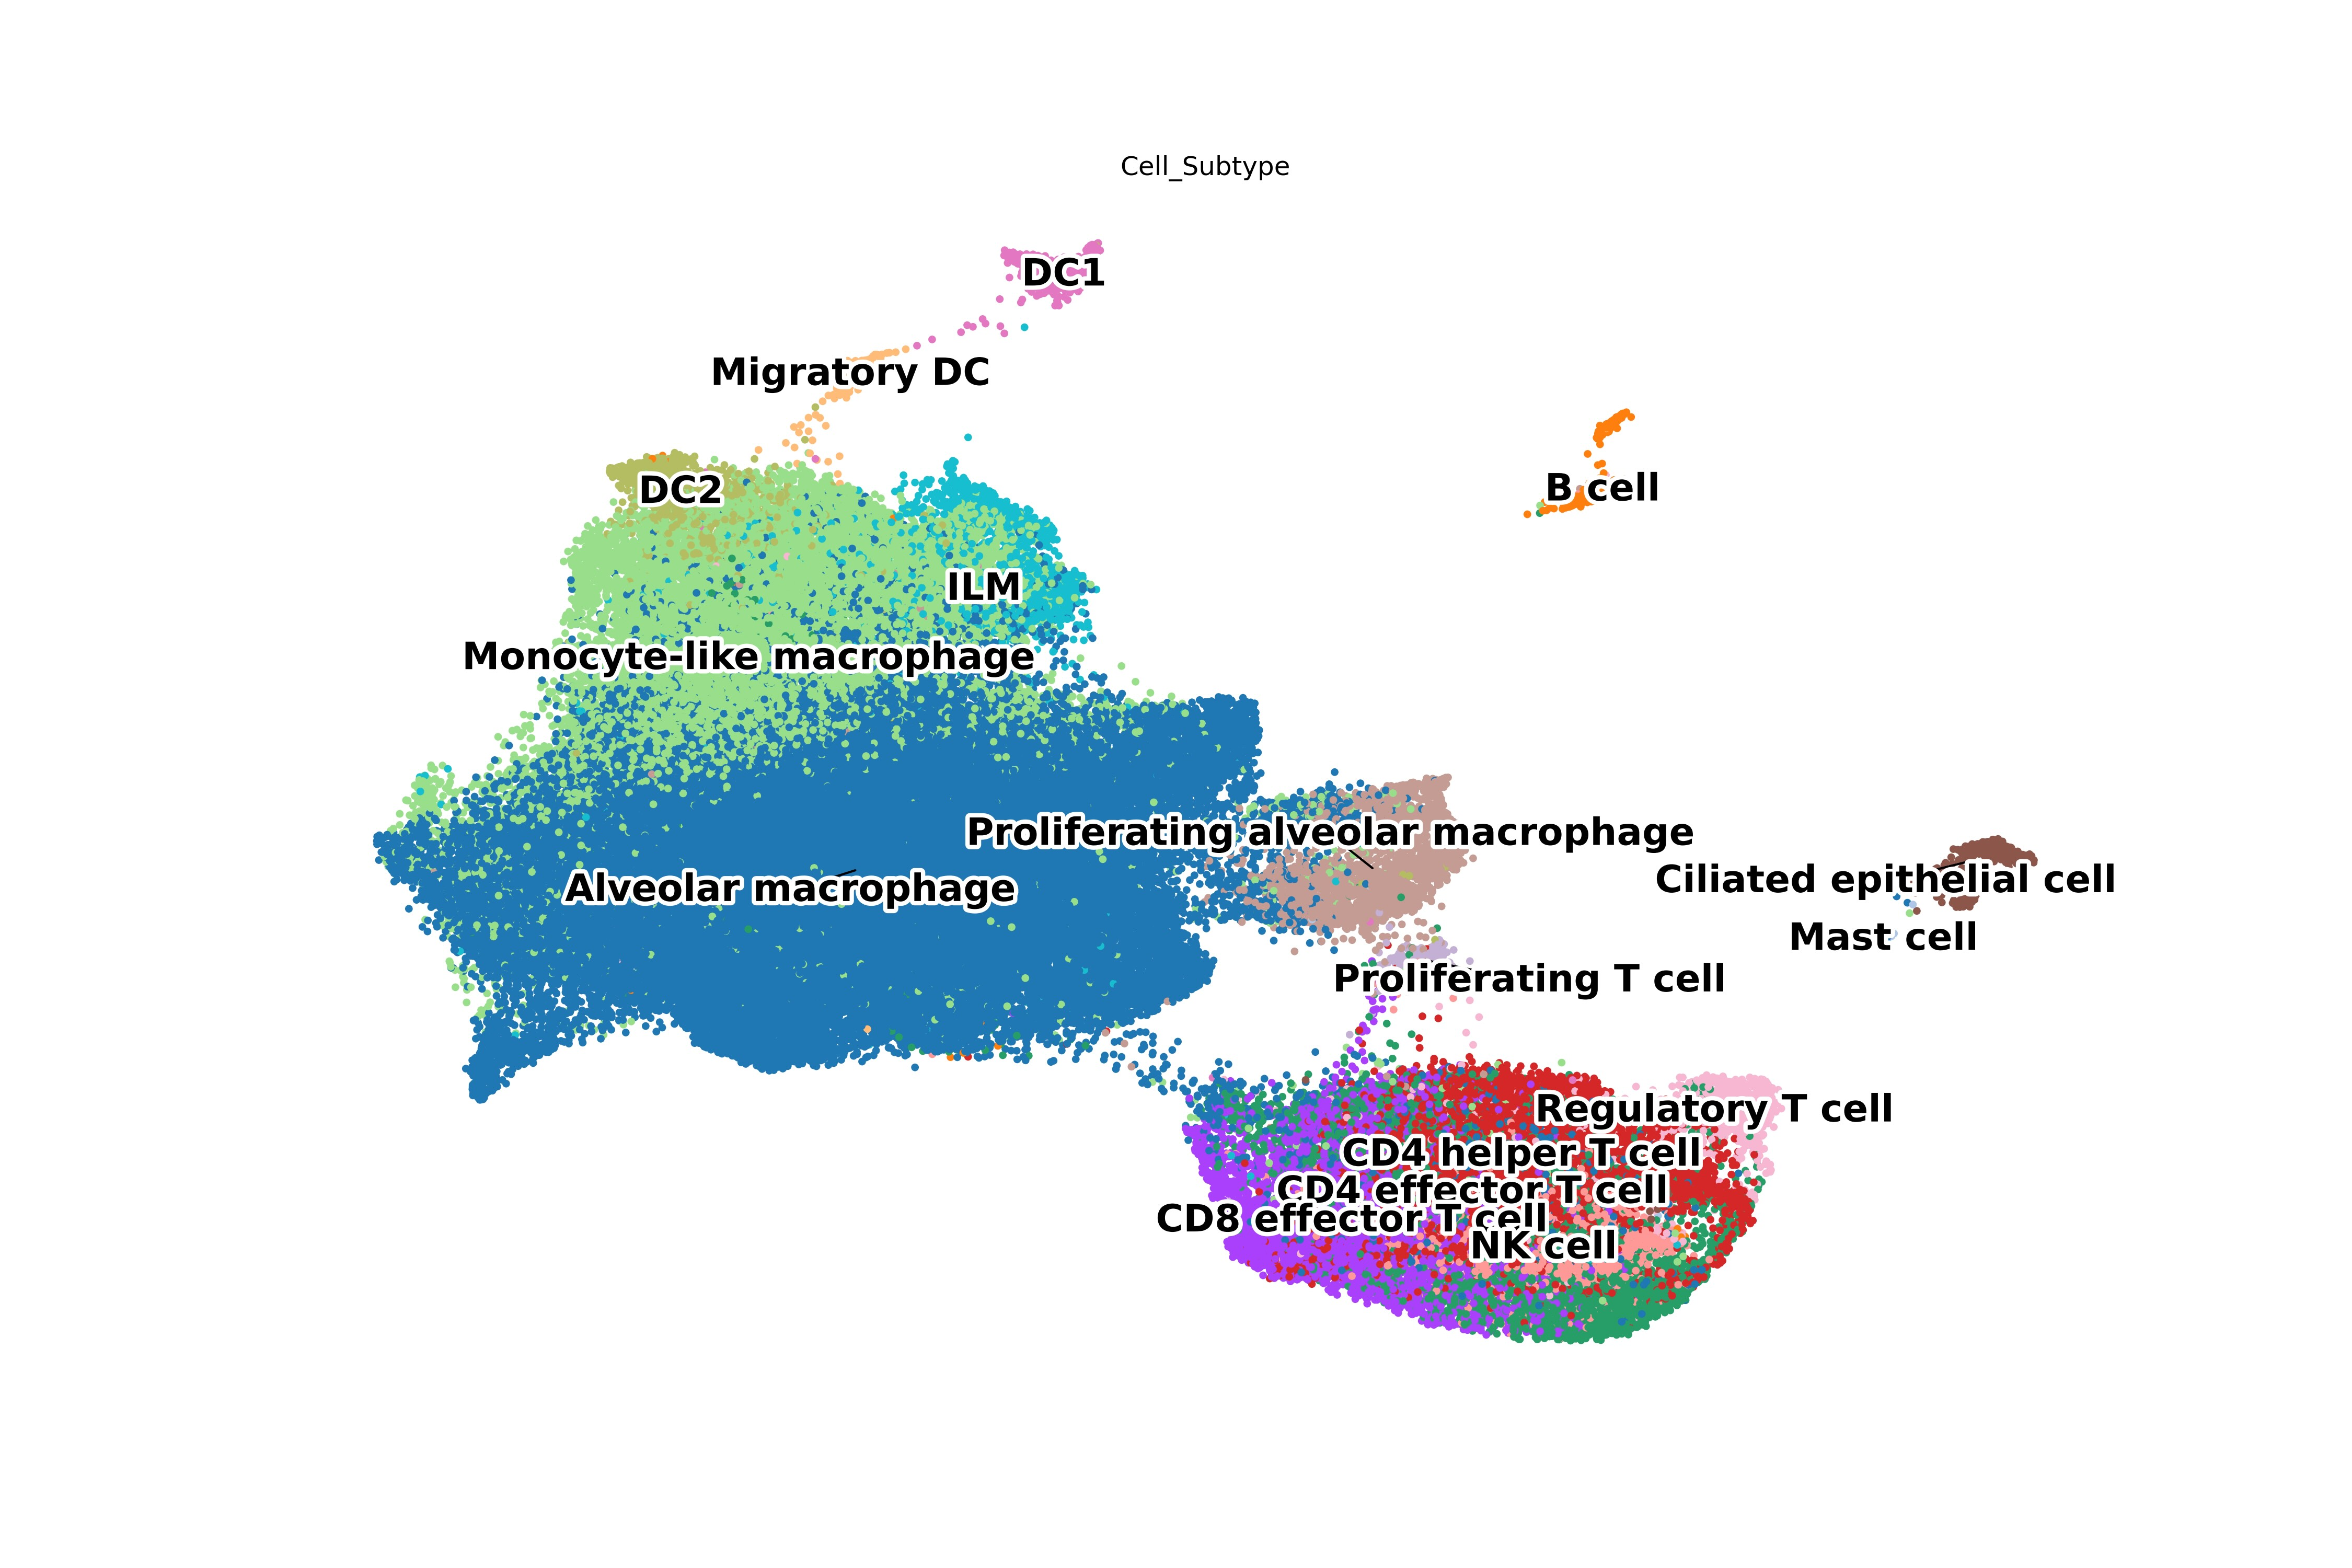

In [ ]:
sc.pl.umap(data, color='Cell_Subtype', save=False, frameon=False, legend_loc='on data', title=None, size=50, legend_fontsize = 'xx-large', legend_fontoutline = 4)

# Adjust text to repel labels
ax = plt.gca()
texts = [child for child in ax.get_children() if isinstance(child, plt.Text)]

# Define the subtypes for to use arrows
subtypes_with_arrows = ['Proliferating alveolar macrophage', 'Alveolar macrophage', 'Proliferating T cell', 'Ciliated epithelial cell']

# Filter texts to include only those that match the desired subtypes
texts_with_arrows = [text for text in texts if text.get_text() in subtypes_with_arrows]

adjust_text(texts_with_arrows, arrowprops=dict(arrowstyle='-', color='k', lw=1))


## Figure 1b: Proportion of cell types by disease

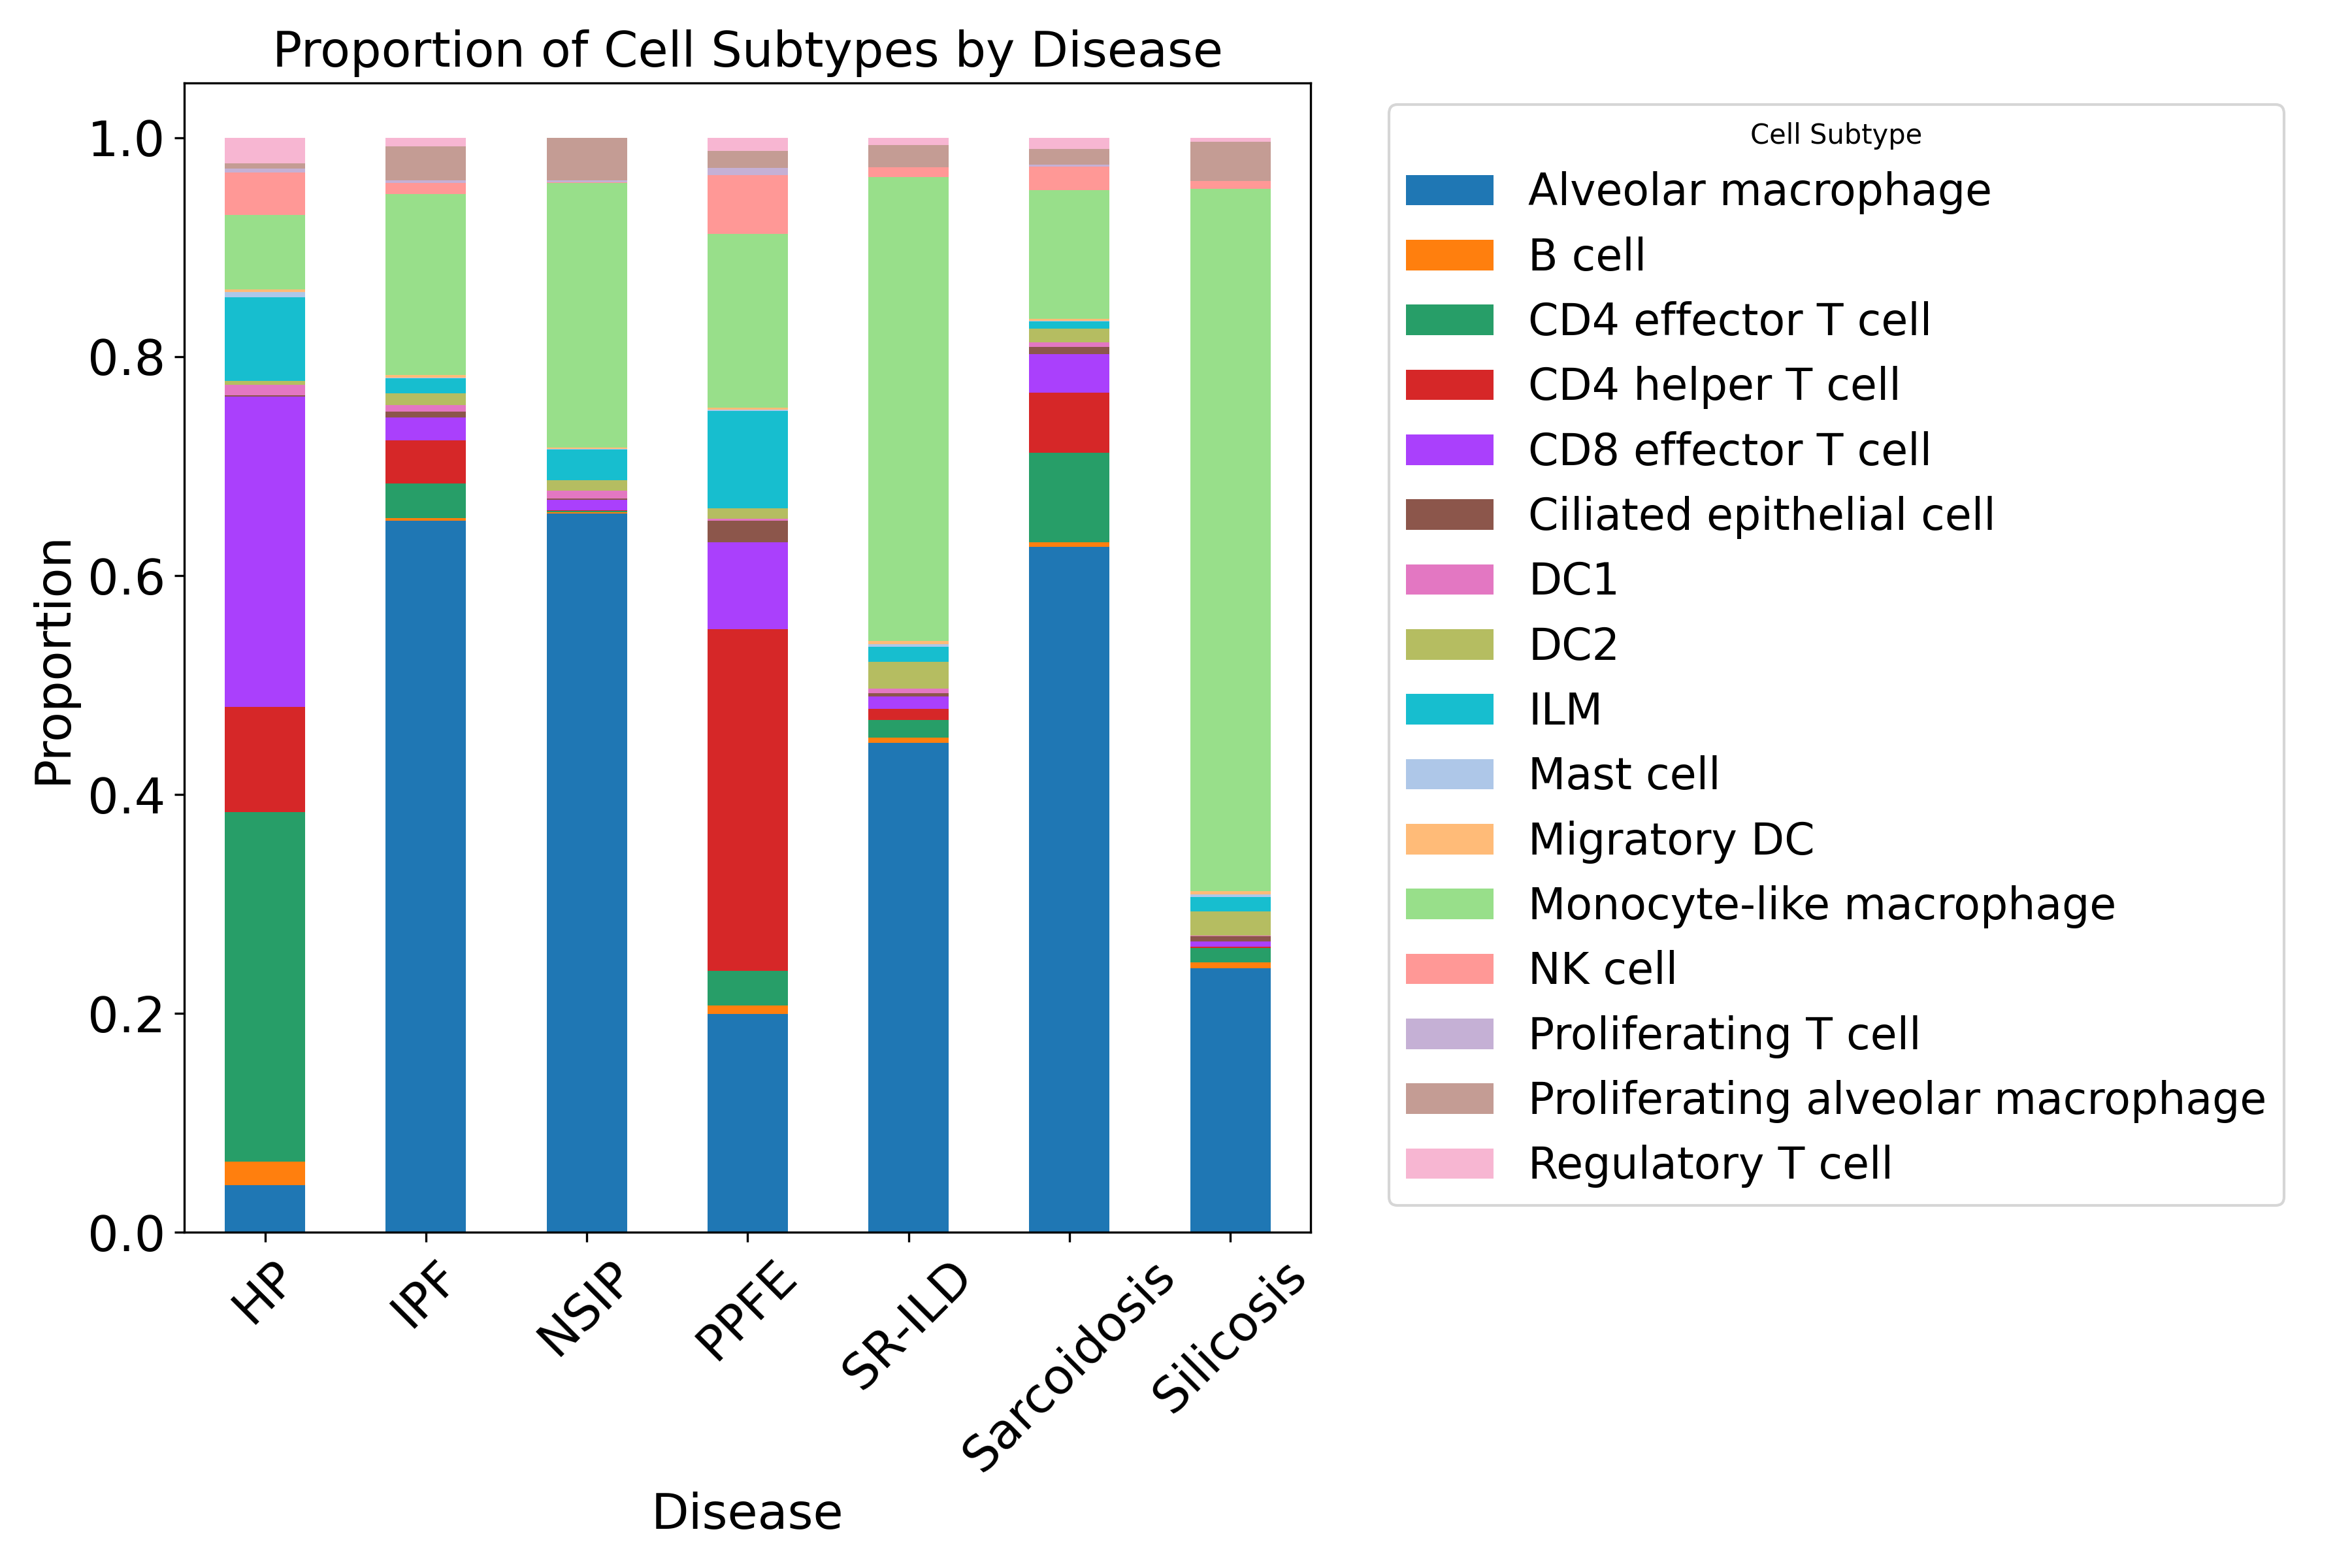

In [ ]:
proportion = data.obs.groupby('disease_final')['Cell_Subtype'].value_counts(normalize=True).unstack().fillna(0)

ax = proportion.plot(kind='bar', stacked=True, figsize=(12, 8), color=[umap_colors.get(x, '#333333') for x in proportion.columns])
plt.title('Proportion of Cell Subtypes by Disease', fontsize=18)
plt.xlabel('Disease', fontsize=18)  # Increased font size for x-axis label
plt.ylabel('Proportion', fontsize=18)  # Increased font size for y-axis label
plt.xticks(rotation=45, fontsize=18)  # Increased font size for x-axis tick labels
plt.yticks(fontsize=18)  # Increased font size for y-axis tick labels

plt.legend(title='Cell Subtype', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16)  # Increased font size for legend
plt.tight_layout()